<a href="https://colab.research.google.com/github/udayfulkatwar/Green-AI-Workshop/blob/main/Solar_Panel_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")


Libraries imported successfully!


In [ ]:
# Step 2: Create a synthetic dataset
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic weather data
num_samples = 1000
temperature = np.random.uniform(15, 45, num_samples)  # Temperature in degrees Celsius
humidity = np.random.uniform(20, 80, num_samples)     # Humidity in percentage
solar_irradiance = np.random.uniform(300, 1000, num_samples)  # Solar irradiance in W/m²

# Simulate energy output based on the weather parameters
# Adding some noise for realism
energy_output = (
    0.5 * solar_irradiance +
    0.3 * temperature -
    0.2 * humidity +
    np.random.normal(0, 10, num_samples)  # Gaussian noise
)

# Create a DataFrame
data = pd.DataFrame({
    'Temperature (°C)': temperature,
    'Humidity (%)': humidity,
    'Solar Irradiance (W/m²)': solar_irradiance,
    'Energy Output (kWh)': energy_output
})

# Display the first few rows of the dataset
print("Synthetic dataset created!")
data.head()


Synthetic dataset created!


,Temperature (°C),Humidity (%),Solar Irradiance (W/m²),Energy Output (kWh)
0,26.236204,31.107976,483.193979,253.845619
1,43.521429,52.514057,472.885159,245.166257
2,36.959818,72.376750,934.378206,470.637392
3,32.959755,63.933493,474.682340,220.782841
4,19.680559,68.393669,490.364808,249.527278


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         1000 non-null   float64
 1   Humidity (%)             1000 non-null   float64
 2   Solar Irradiance (W/m²)  1000 non-null   float64
 3   Energy Output (kWh)      1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB
None

Summary Statistics:
       Temperature (°C)  Humidity (%)  Solar Irradiance (W/m²)  \
count       1000.000000   1000.000000              1000.000000   
mean          29.707697     50.421038               651.684008   
std            8.764121     17.531394               203.471937   
min           15.138961     20.193096               300.008144   
25%           22.079198     34.464456               482.945684   
50%           29.904221     51.124034               650.429744   
75%           37.3295

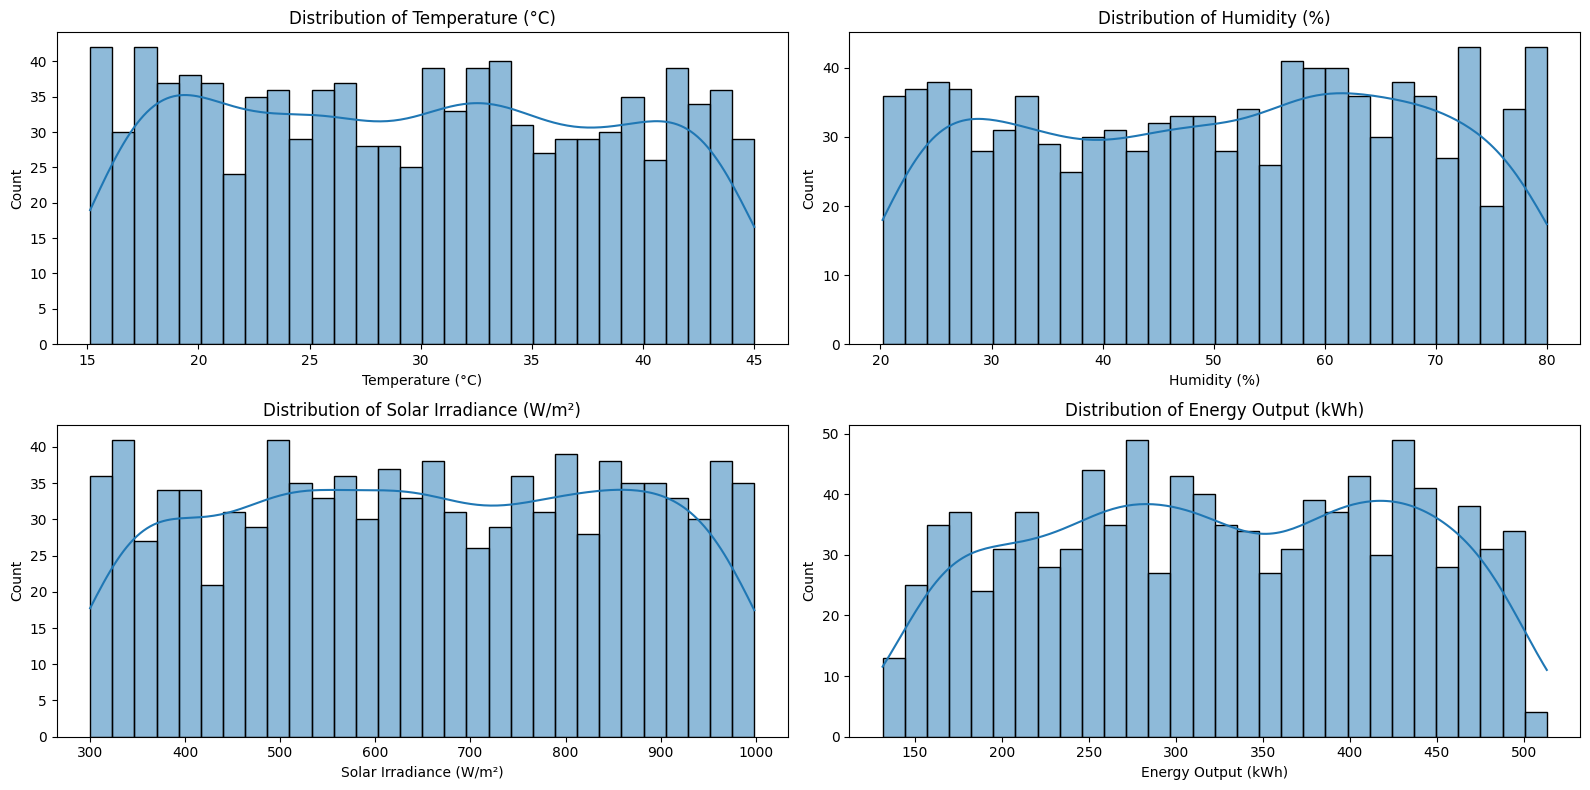

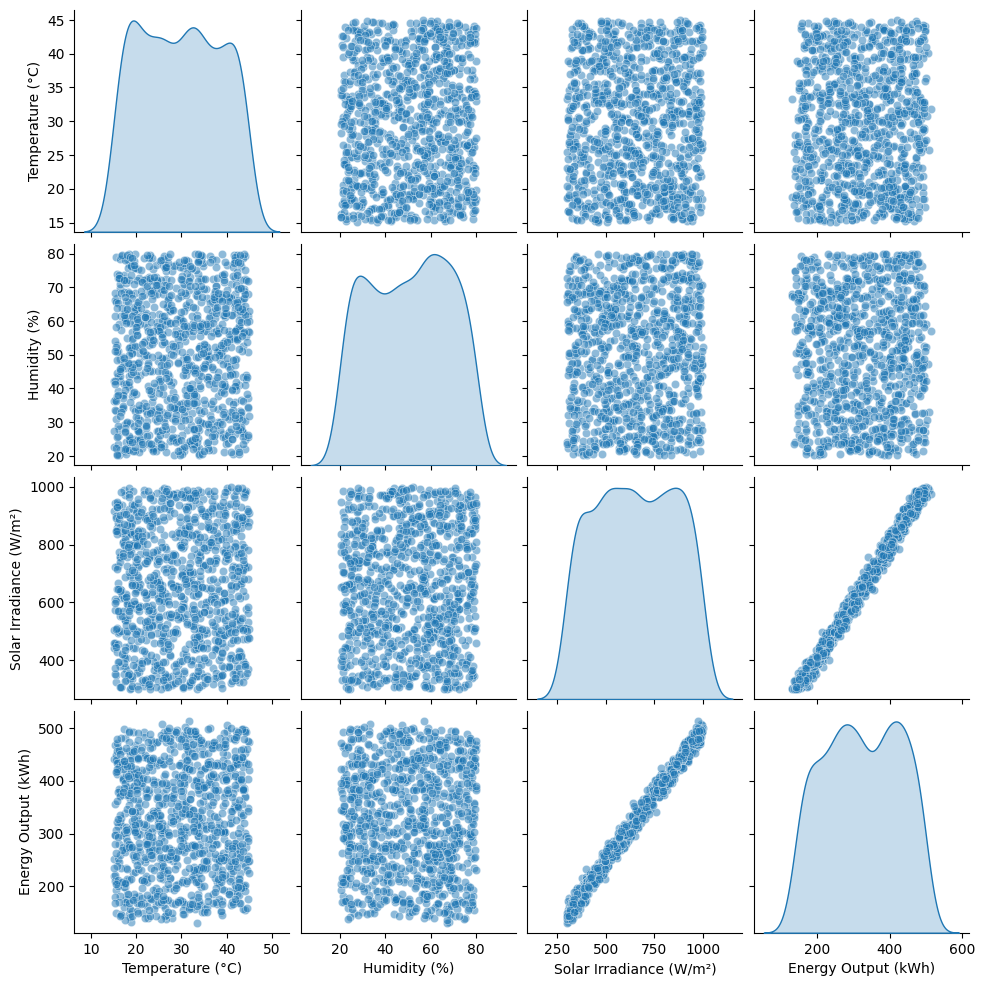

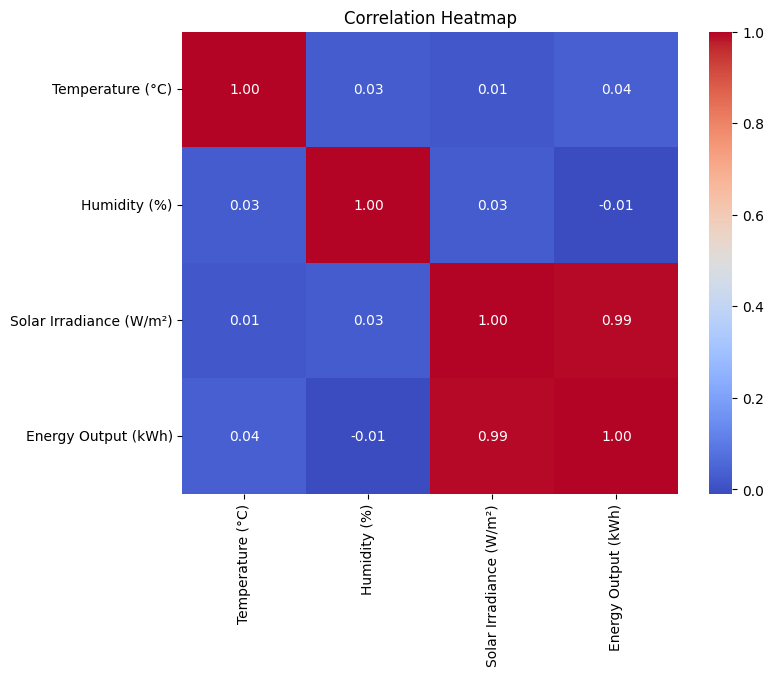

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)

# Basic information about the dataset
print("Dataset Information:")
print(data.info())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Visualize the distribution of each feature
plt.figure(figsize=(16, 8))

for i, column in enumerate(data.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Pairplot to observe relationships between features
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Step 4: Data Preprocessing

# Separate the features (X) and the target variable (y)
X = data[['Temperature (°C)', 'Humidity (%)', 'Solar Irradiance (W/m²)']]
y = data['Energy Output (kWh)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print the shapes of the training and testing sets
print(f"Training feature set shape: {X_train.shape}")
print(f"Testing feature set shape: {X_test.shape}")
print(f"Training target set shape: {y_train.shape}")
print(f"Testing target set shape: {y_test.shape}")


Training feature set shape: (800, 3)
Testing feature set shape: (200, 3)
Training target set shape: (800,)
Testing target set shape: (200,)


In [ ]:
# Step 5: Train a Linear Regression Model

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Linear Regression Model Performance:
Mean Absolute Error (MAE): 8.78
Mean Squared Error (MSE): 111.02
R² Score: 0.99


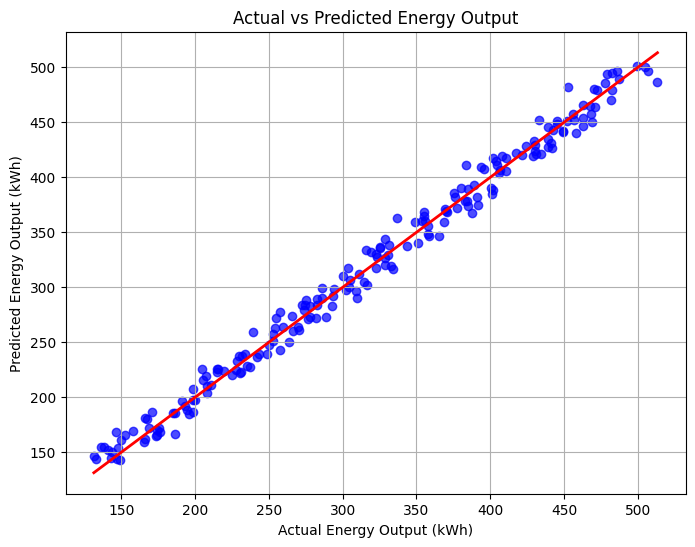

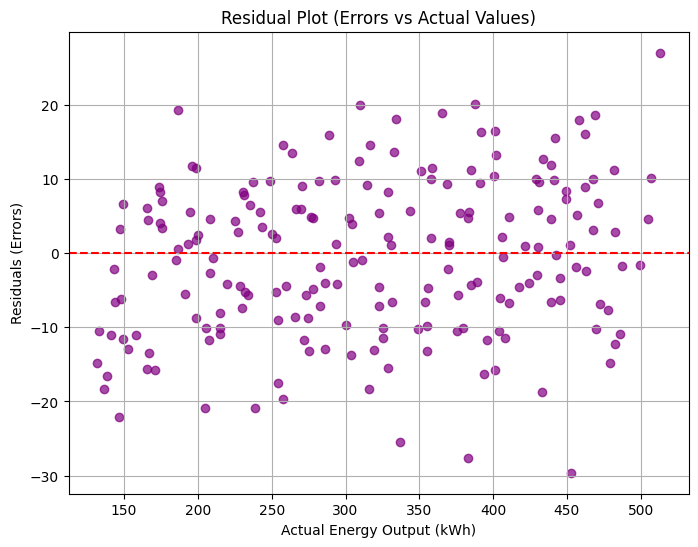

In [ ]:
# Step 6: Visualize the Results

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Energy Output')
plt.xlabel('Actual Energy Output (kWh)')
plt.ylabel('Predicted Energy Output (kWh)')
plt.grid(True)
plt.show()

# Residual plot (Errors vs Actual values)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Errors vs Actual Values)')
plt.xlabel('Actual Energy Output (kWh)')
plt.ylabel('Residuals (Errors)')
plt.grid(True)
plt.show()
